# DIABETES DATA PROJECT - Wendy Wong

* I dedicate this data science project to my dad who a stroke He has diabetes and hence I wanted to find a suitable stroke dataset but chose the diabetes dataset from UCI Machine Learning repository to discover patterns through data science principles using machine learning to predict: hospital admissions for emergency for multiple diagnoses, medication, age, race and time in hospital that related to Asian males over 60.

## Data Source

* Diabetes dataset was sourced from the UCI Machine Learning Repository which includes time-series data:

https://archive.ics.uci.edu/ml/datasets/Diabetes

The data was sourced from two sources electronic recording device and also hand written patient records from 130 US hospitals from 1999 to 2008 in Illinois.

## Data Dictionary:

#### admission_type_id,description
*1=Emergency
*2=Urgent
*3=Elective
*4=Newborn
*5=Not Available
*6=NULL
*7=Trauma Center
*8=Not Mapped

#### admission_source_id,description
*1=Physician Referral,
*2=Clinic Referral,
*3=HMO Referral,
*4=Transfer from a hospital
*5=Transfer from a Skilled Nursing Facility (SNF)
*6=Transfer from another health care facility
*7=Emergency Room
*8=Court/Law Enforcement
*9=Not Available
*10=Transfer from critial access hospital
*11=Normal Delivery
*12=Premature Delivery
*13=Sick Baby
*14=Extramural Birth
*15=Not Available
*17=NULL
*18=Transfer From Another Home Health Agency
*19=Readmission to Same Home Health Agency
*20=Not Mapped
*21=Unknown/Invalid
*22=Transfer from hospital inpt/same fac reslt in a sep claim
*23=Born inside this hospital
*24=Born outside this hospital
*25=Transfer from Ambulatory Surgery Center
*26=Transfer from Hospice

#### Categorical Variables:

*gender: Female =1,Male =0, Unknown/Invalid = 2
* race: ? =0,Caucasian=1,AfricanAmerican = 2,Other = 3,Hispanic =4, Asian =5  
*insulin:  Steady=0,Up=1,Down=2
*readmitted: NO = 0,>30=1,<30=2, 
*age: [0-10)=0,[10-20)=1,[20-30)=2,[30-40)=3,[40-50)=4,[50-60)=5,[60-70)=6,[70-80)=7,[80-90)=8,[90-100)=9
*diabetedMed: No=0, Yes =1

### 50 Variables 101766 observations:

*encounter_id                
*patient_nbr                 
*race                       
*gender                      
*age                         
*weight                      
*admission_type_id           
*discharge_disposition_id    
*admission_source_id         
*time_in_hospital            
*payer_code                  
*medical_specialty           
*num_lab_procedures         
*num_procedures              
*num_medications           
*number_outpatient          
*number_emergency           
*number_inpatient            
*diag_1                     
*diag_2                      
*diag_3                      
*number_diagnoses            
*max_glu_serum              
*A1Cresult                  
*metformin                   
*repaglinide                 
*nateglinide                
*chlorpropamide              
*glimepiride                 
*acetohexamide               
*glipizide                 
*glyburide                   
*tolbutamide                 
*pioglitazone              
*rosiglitazone              
*acarbose                    
*miglitol                    
*troglitazone               
*tolazamide                 
*examide                     
*citoglipton                 
*insulin                     
*glyburide-metformin         
*glipizide-metformin        
*glimepiride-pioglitazone    
*metformin-rosiglitazone     
*metformin-pioglitazone      
*change                     
*diabetesMed                 
*readmitted                


# Problem: 

* Research problem: Predict how long people with diabetes get admitted into Emergency section of the hospital? 
* What are the main reasons for hospital admission is it just for diabetes and another medical condition?
* What characteristics do diabetes patients all have in common, what are the patterns from their health records?


#### Exploratory Questions
* Predict how many people are re-admitted into hospital have diabetes using Logistic regression classification
* Use Unsupervised Learning to  identify patterns and groups of people who have diabetes
* Identify if the reasons for hospital admission for diabetes and another medical condition
* To investigate the predictor variables to identify a person as having Diabetes using Decision Tree and Bagging  as ensemble methods to improve the results of  modelling

#### Import Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import datasets
import statsmodels.formula.api as smf
import matplotlib.cm as cm
import statsmodels.api as sm

# Show plots inside a notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Read the data into a Pandas DataFrame
# Load Dataframe from  csv file

diabetic_data = pd.read_csv('diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Data Pre-Processing 

#### Handling Missing values

### Create a new dataframe ( with Columns of Interest)

In [5]:
# Drop columns with missing values 'na' as we do not want to impute them
diabetic_data.dropna()  

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Create a New dataframe and get only admission_type_id, diabetesMed,race, gender, age,number_diagnoses,num_procedures, race, num_medications, time_in_hospital,'insulin','readmitted', 'admission_source_id'
diabetic_data = diabetic_data[['admission_type_id','number_diagnoses','num_procedures','admission_source_id', 'readmitted','diabetesMed','race','number_outpatient','num_lab_procedures','gender','age','num_medications','number_inpatient','number_emergency','time_in_hospital','insulin']]

#### Prepare the dataset

In [6]:
X = diabetic_data['diabetesMed'].values
X = X[:, np.newaxis]
X.shape

(101766, 1)

In [7]:
y = diabetic_data['readmitted'].values
y.shape

(101766,)

## Class label encoding - Transform categorical variables for Machine Learning

In [8]:
## Encode class labels

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['<30', '>30', 'NO'], dtype=object)

In [9]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

In [11]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['<30', '>30', 'NO'], dtype=object)

In [12]:
X = diabetic_data.iloc[:, :16].values 
y = diabetic_data['readmitted'].values
np.unique(y)

array(['<30', '>30', 'NO'], dtype=object)

In [13]:
# Use Scikit-learn estimators for classification convert labels to integers internally
# we enumerate the class labels starting at 0:

import numpy as np
race_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['race']))}
race_mapping
{'?':0,'Caucasian':1,'AfricanAmerican':2,'Other':3,'Hispanic':4,'Asian':5}

gender_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['gender']))}
gender_mapping
{'Male':0,'Female':1,'Unknown/Invalid':2}

age_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['age']))}
age_mapping
{'[0-10)':0,'[10-20)':1,'[20-30)':2,'[30-40)':3,'[40-50)':4,'[50-60)':5,'[60-70)':5,'[70-80)':7,'[80-90)':8,'[90-100)':9}

insulin_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['insulin']))}
insulin_mapping
{'No':0,'Steady':1,'Up':2,'Down':3}

diabetesMed_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['diabetesMed']))}
diabetesMed_mapping
{'No':0,'Yes':1}

readmitted_mapping = {label:idx for idx,label in
                enumerate(np.unique(diabetic_data['readmitted']))}
readmitted_mapping
{'NO':0,'>30':1,'<30':2}

{'<30': 2, '>30': 1, 'NO': 0}

In [14]:
diabetic_data['gender'] = diabetic_data['gender'].map(gender_mapping)
diabetic_data['diabetesMed'] = diabetic_data['diabetesMed'].map(diabetesMed_mapping)
diabetic_data['age'] = diabetic_data['age'].map(age_mapping)
diabetic_data['race'] = diabetic_data['race'].map(race_mapping)
diabetic_data['insulin'] = diabetic_data['insulin'].map(insulin_mapping)
diabetic_data['readmitted'] = diabetic_data['readmitted'].map(readmitted_mapping)
diabetic_data.head()
diabetic_data.shape  # check number of features remaining in the dataset

(101766, 16)

### Remove any duplicate records

In [15]:
# Remove any duplicate records  and count how many records
diabetic_data_no_duplicates = diabetic_data.drop_duplicates()

In [16]:
# Get the dimensions of the dataframe
diabetic_data.shape
diabetic_data_no_duplicates.shape

(101720, 16)

###  Check that all variables are pre-processed into integers

In [17]:
# Examining the data type of the Diabetic data 
diabetic_data.dtypes            # data types of each column

admission_type_id      int64
number_diagnoses       int64
num_procedures         int64
admission_source_id    int64
readmitted             int64
diabetesMed            int64
race                   int64
number_outpatient      int64
num_lab_procedures     int64
gender                 int64
age                    int64
num_medications        int64
number_inpatient       int64
number_emergency       int64
time_in_hospital       int64
insulin                int64
dtype: object

### Save pre-processed data as a separate file and work with this file from now on

In [18]:
diabetic_data.to_csv('diabetic_data_clean.csv',index=False)
diabetes3 = pd.read_csv('diabetic_data_clean.csv')

### Data Exploration

In [16]:
diabetes3.tail()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
101761,1,9,0,7,1,1,1,0,51,1,7,16,0,0,3,0
101762,1,9,3,5,2,1,1,0,33,0,8,18,1,0,5,2
101763,1,13,0,7,2,1,3,1,53,1,7,9,0,0,1,0
101764,2,9,2,7,2,1,3,0,45,0,8,21,1,0,10,3
101765,1,9,3,7,2,0,3,0,13,1,7,3,0,0,6,1


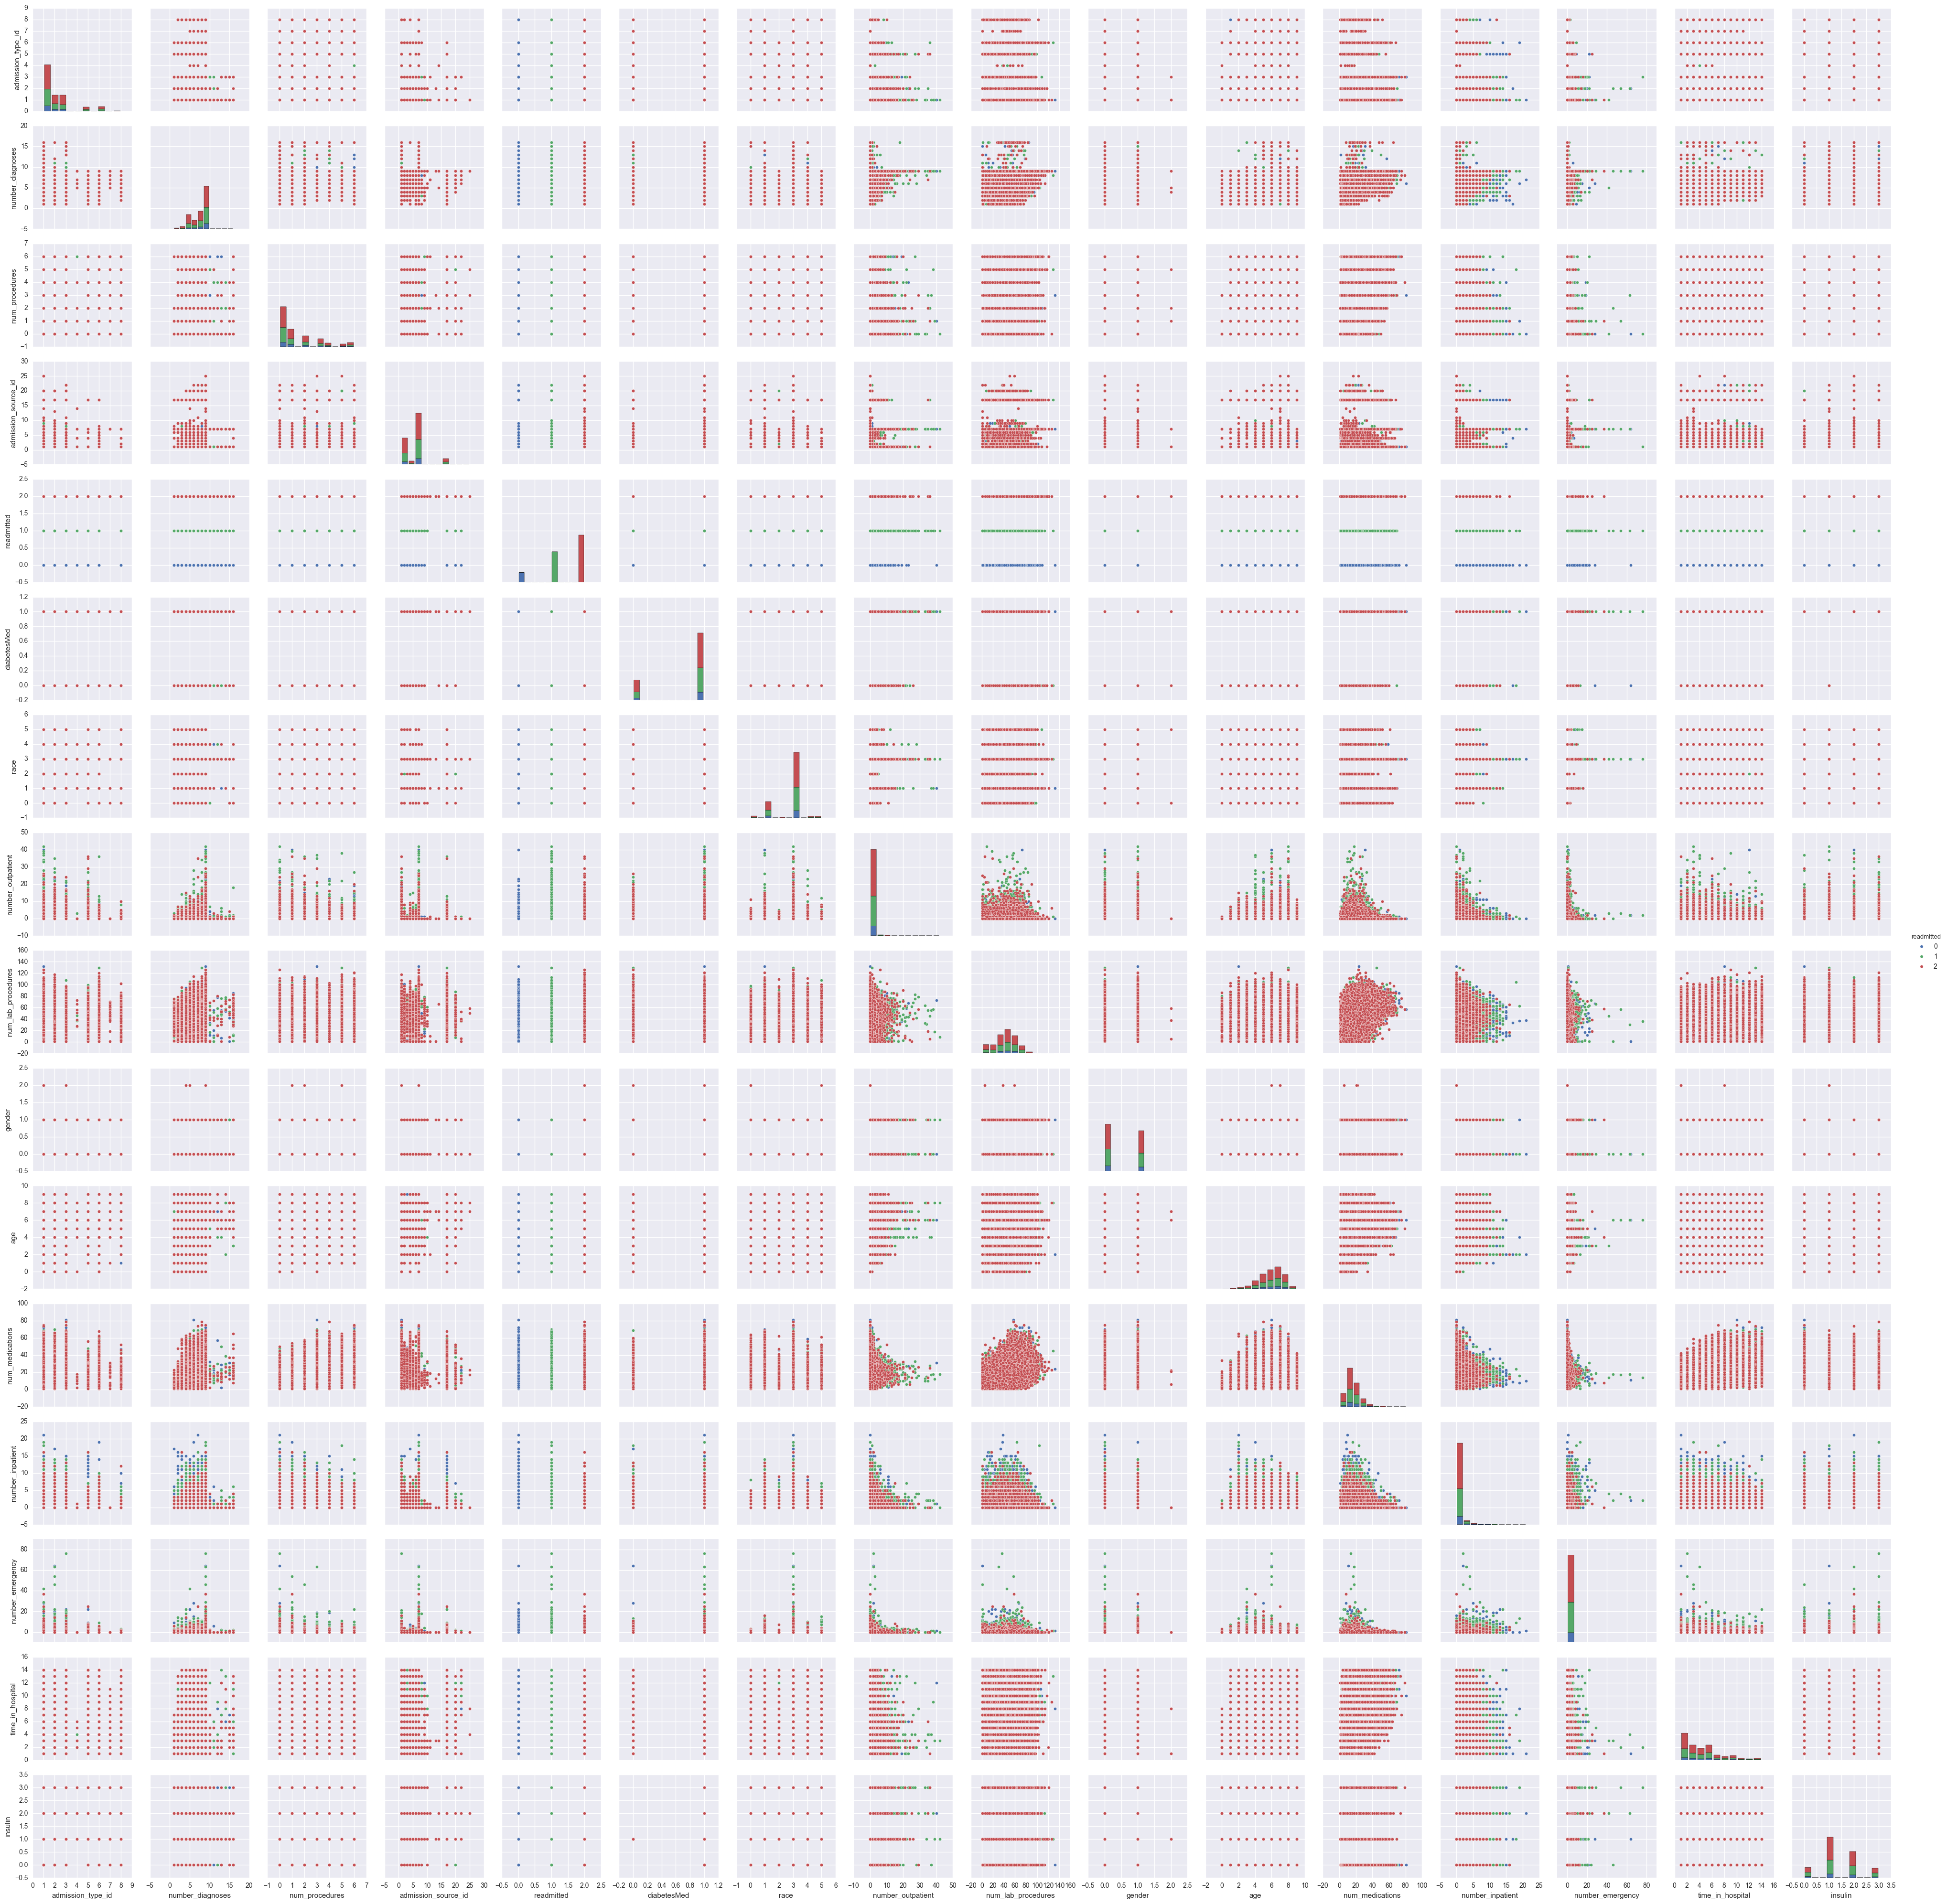

In [20]:
# Look at a scatterplot matrix from transformed and cleaned data

sb.pairplot(diabetes3,hue='readmitted')

In [17]:
# Summarise the data
diabetes3.describe()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,7.422607,1.339730,5.754437,1.427520,0.770031,2.598776,0.369357,43.095641,0.462443,6.096702,16.021844,0.635566,0.197836,4.395987,1.405469
std,1.445403,1.933600,1.705807,4.064081,0.684068,0.420815,0.938415,1.267265,19.674362,0.498649,1.594084,8.127566,1.262863,0.930472,2.985108,0.838798
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,6.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,31.000000,0.000000,5.000000,10.000000,0.000000,0.000000,2.000000,1.000000
50%,1.000000,8.000000,1.000000,7.000000,2.000000,1.000000,3.000000,0.000000,44.000000,0.000000,6.000000,15.000000,0.000000,0.000000,4.000000,1.000000
75%,3.000000,9.000000,2.000000,7.000000,2.000000,1.000000,3.000000,0.000000,57.000000,1.000000,7.000000,20.000000,1.000000,0.000000,6.000000,2.000000
max,8.000000,16.000000,6.000000,25.000000,2.000000,1.000000,5.000000,42.000000,132.000000,2.000000,9.000000,81.000000,21.000000,76.000000,14.000000,3.000000


### Examine "diabetesMed" column: 1 represents having diabetes, 0 represents not

In [18]:
# group the data by patients with 'diabetesMed'

bypatient = diabetes3.groupby('diabetesMed')

bypatient.describe()

admission_source_id  admission_type_id           age  \
diabetesMed                                                               
0           count         23403.000000       23403.000000  23403.000000   
            mean              5.743281           2.024826      6.162629   
            std               4.027094           1.477064      1.602481   
            min               1.000000           1.000000      0.000000   
            25%               1.000000           1.000000      5.000000   
            50%               7.000000           1.000000      6.000000   
            75%               7.000000           3.000000      7.000000   
            max              20.000000           8.000000      9.000000   
1           count         78363.000000       78363.000000  78363.000000   
            mean              5.757768           2.023761      6.077013   
            std               4.075081           1.435821      1.591048   
            min               1.000000           1.000000      0.000000   
            25%               1.000000           1.000000      5.000000   
            50%               7.000000           1.000000      6.000000   
            75%               7.000000           3.000000      7.000000   
            max              25.000000           8.000000      9.000000   

                         gender       insulin  num_lab_procedures  \
diabetesMed                                                         
0           count  23403.000000  23403.000000        23403.000000   
            mean       0.447934      1.000000           41.903730   
            std        0.497378      0.000000           19.092522   
            min        0.000000      1.000000            1.000000   
            25%        0.000000      1.000000           31.000000   
            50%        0.000000      1.000000           43.000000   
            75%        1.000000      1.000000           55.000000   
            max        2.000000      1.000000          129.000000   
1           count  78363.000000  78363.000000        78363.000000   
            mean       0.466776      1.526562           43.451603   
            std        0.498949      0.921925           19.831052   
            min        0.000000      0.000000            1.000000   
            25%        0.000000      1.000000           32.000000   
            50%        0.000000      2.000000           45.000000   
            75%        1.000000      2.000000           57.000000   
            max        2.000000      3.000000          132.000000   

                   num_medications  num_procedures  number_diagnoses  \
diabetesMed                                                            
0           count     23403.000000    23403.000000      23403.000000   
            mean         13.242063        1.361022          7.347648   
            std           7.030729        1.672721          1.935411   
            min           1.000000        0.000000          1.000000   
            25%           8.000000        0.000000          6.000000   
            50%          12.000000        1.000000          8.000000   
            75%          17.000000        2.000000          9.000000   
            max          69.000000        6.000000         16.000000   
1           count     78363.000000    78363.000000      78363.000000   
            mean         16.852022        1.333372          7.444993   
            std           8.247816        1.715523          1.932508   
            min           1.000000        0.000000          1.000000   
            25%          11.000000        0.000000          6.000000   
            50%          15.000000        1.000000          8.000000   
            75%          21.000000        2.000000          9.000000   
            max          81.000000        6.000000         16.000000   

                   number_emergency  number_inpatient  number_outpatient  \
diabetesMed                                         

In [19]:
diabetes3.groupby('diabetesMed').mean()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
diabetesMed,,,,,,,,,,,,,,,
0,2.024826,7.347648,1.361022,5.743281,1.499252,2.609708,0.331197,41.903730,0.447934,6.162629,13.242063,0.575482,0.153698,4.054480,1.000000
1,2.023761,7.444993,1.333372,5.757768,1.406097,2.595511,0.380754,43.451603,0.466776,6.077013,16.852022,0.653510,0.211018,4.497977,1.526562


In [20]:
# filter DataFrame to only include admission_type_id (emergency=1) with diabetes medication= Yes. 41266 diabetic patients

diabetes3[diabetes3.admission_type_id.isin([1])] 
diabetes3[(diabetes3.admission_type_id==1)].diabetesMed.value_counts() 

1    41266
0    12724
Name: diabetesMed, dtype: int64

In [21]:
 # examine Number of emergency admissions  =1 for Diabetic medication ( yes and no) is 53990
diabetes3.groupby('admission_type_id').count()

,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
admission_type_id,,,,,,,,,,,,,,,
1,53990,53990,53990,53990,53990,53990,53990,53990,53990,53990,53990,53990,53990,53990,53990
2,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480
3,18869,18869,18869,18869,18869,18869,18869,18869,18869,18869,18869,18869,18869,18869,18869
4,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
5,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785,4785
6,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291
7,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
8,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


In [22]:
diabetes3.groupby('readmitted').mean()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
readmitted,,,,,,,,,,,,,,,
0,1.976490,7.692789,1.280884,5.821168,0.802237,2.609316,0.436911,44.226028,0.458308,6.176015,16.903143,1.224003,0.357313,4.768249,1.411640
1,2.029034,7.646898,1.249599,5.965030,0.796680,2.619947,0.496329,43.836601,0.450893,6.140526,16.282768,0.838993,0.283669,4.495541,1.406639
2,2.030585,7.221366,1.410305,5.604185,0.746099,2.582878,0.273112,42.381598,0.470782,6.051892,15.670367,0.381963,0.109216,4.254429,1.403434


In [24]:
# We can also aggregate by group 
bypatient['num_medications'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,13.242063,7.030729
1,78363,16.852022,8.247816


## Data Visualisation

In [25]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

In [26]:
import seaborn as sns
sns.set(color_codes=True)

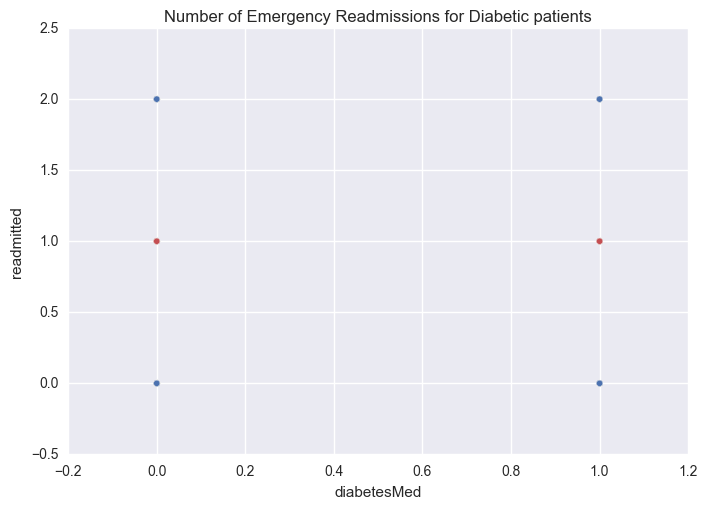

In [27]:
#  scatterplot, except all emergency readmission are colored red
colors = np.where(diabetes3.readmitted==1, 'r', 'b')
diabetes3.plot(kind='scatter', x='diabetesMed', y='readmitted', c=colors)
plt.title('Number of Emergency Readmissions for Diabetic patients')

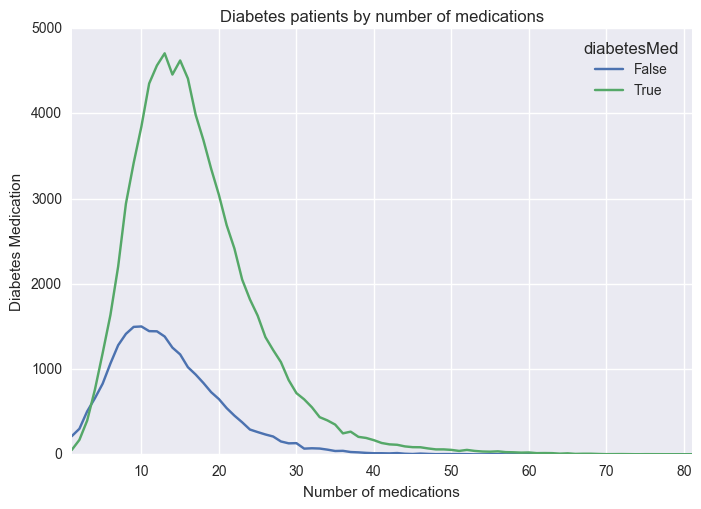

In [28]:
#barplot of diabetesMed grouped by num_medications(True or False)
pd.crosstab(diabetes3.num_medications, diabetes3.diabetesMed.astype(bool)).plot(kind='line')
plt.title('Diabetes patients by number of medications')
plt.xlabel('Number of medications')
plt.ylabel('Diabetes Medication')

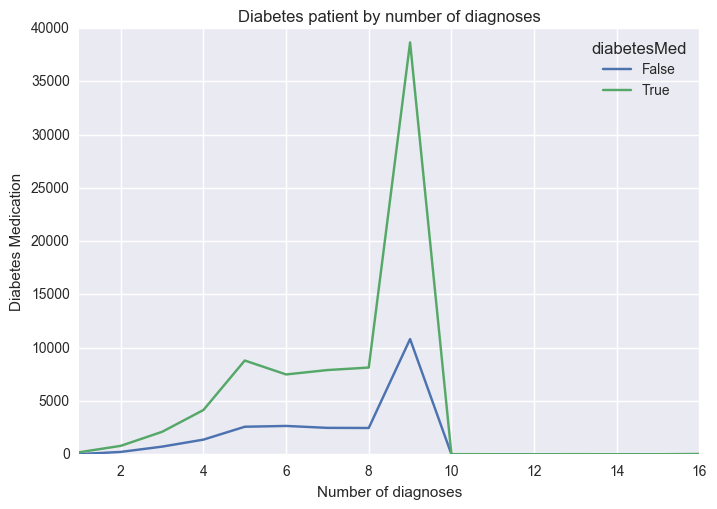

In [29]:
#barplot of diabetesMed grouped by number_diagnoses(True or False)
pd.crosstab(diabetes3.number_diagnoses, diabetes3.diabetesMed.astype(bool)).plot(kind='line')
plt.title('Diabetes patient by number of diagnoses')
plt.xlabel('Number of diagnoses')
plt.ylabel('Diabetes Medication')

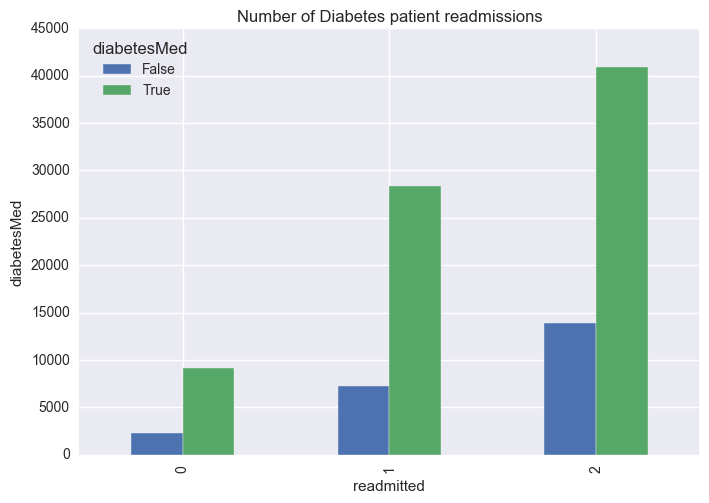

In [30]:
#barplot of diabetesMed grouped by readmission(True or False)
pd.crosstab(diabetes3.readmitted, diabetes3.diabetesMed.astype(bool)).plot(kind='bar')
plt.title('Number of Diabetes patient readmissions')
plt.xlabel('readmitted')
plt.ylabel('diabetesMed')


# readmitted: NO = 0, >30=1, <30=2

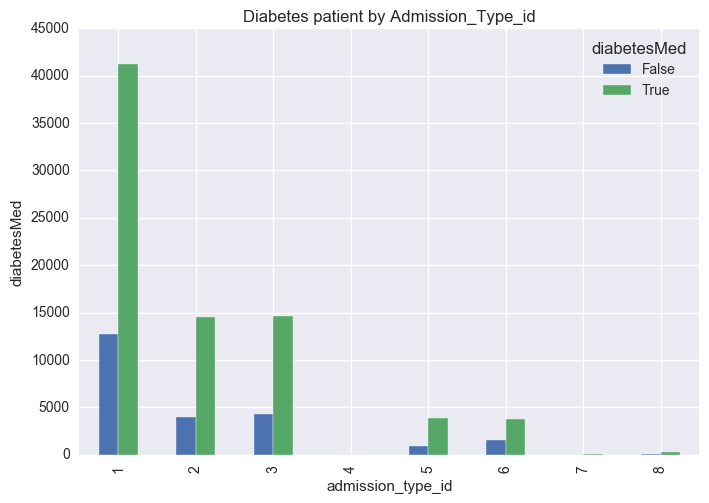

In [31]:
#barplot of diabetesMed grouped by admission_type_id(True or False)
pd.crosstab(diabetes3.admission_type_id, diabetes3.diabetesMed.astype(bool)).plot(kind='bar')
plt.title('Diabetes patient by Admission_Type_id')
plt.xlabel('admission_type_id')
plt.ylabel('diabetesMed')

# admission_type_id -> 1 = Emergency, 2 = Urgent , 3 = Elective

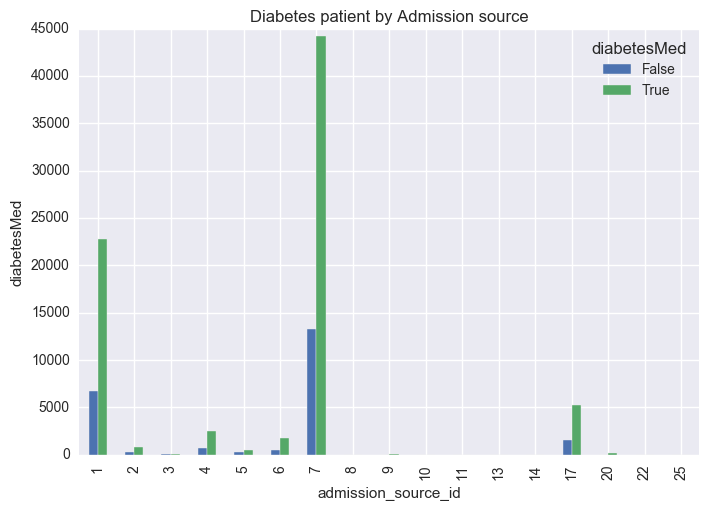

In [32]:
#barplot of diabetesMed grouped by admission_type_id(True or False)
pd.crosstab(diabetes3.admission_source_id, diabetes3.diabetesMed.astype(bool)).plot(kind='bar')
plt.title('Diabetes patient by Admission source')
plt.xlabel('admission_source_id')
plt.ylabel('diabetesMed')

#  Admission_source_id: 1= Physical referral, 7 = Emergency, 17 = NULL

#### Demographics

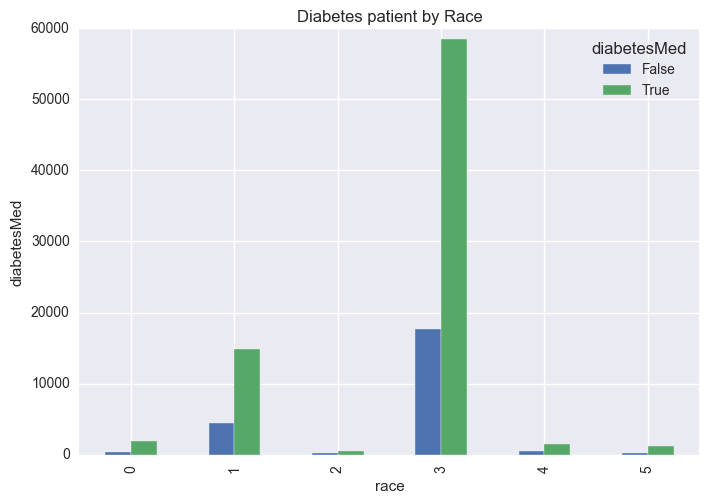

In [33]:
#barplot of diabetesMed grouped by race (True or False)
pd.crosstab(diabetes3.race, diabetes3.diabetesMed.astype(bool)).plot(kind='bar')
plt.title('Diabetes patient by Race')
plt.xlabel('race')
plt.ylabel('diabetesMed')

# Race: ?=0,Caucasian=1,AfricanAmerican = 2,Other = 3,Hispanic =4, Asian =5

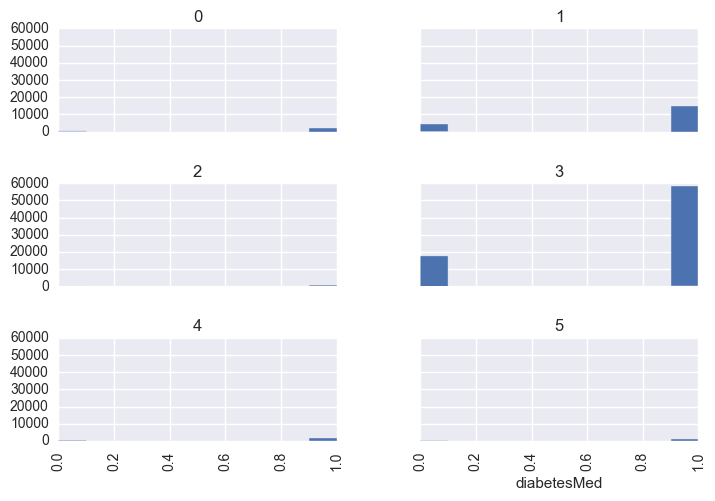

In [34]:
# grouped histogram of diabetesMed grouped by race (shows distribution for each group)

diabetes3.diabetesMed.hist(by=diabetes3.race, sharex=True,sharey=True)
plt.xlabel('diabetesMed')
plt.ylabel('frequency')
# Race: ?=0,Caucasian=1,AfricanAmerican = 2,Other = 3,Hispanic =4, Asian =5

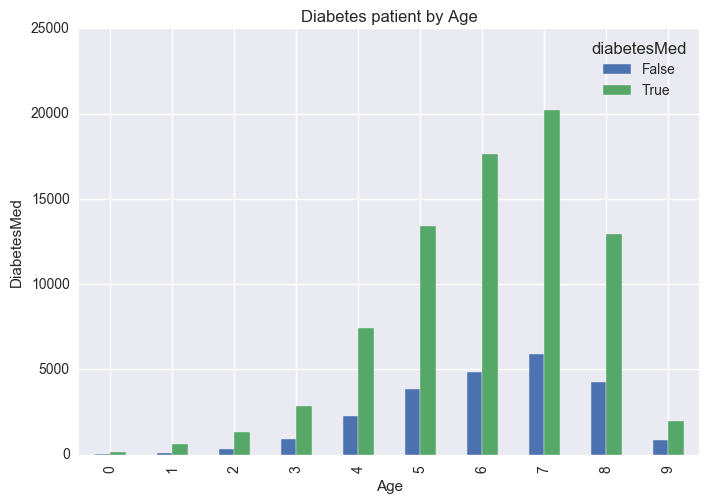

In [35]:
#barplot of diabetesMed grouped by age(True or False)
pd.crosstab(diabetes3.age, diabetes3.diabetesMed.astype(bool)).plot(kind='bar')
plt.title('Diabetes patient by Age')
plt.xlabel('Age')
plt.ylabel('DiabetesMed')

# Age bracket (70-80) have the highest count of diabetes patients

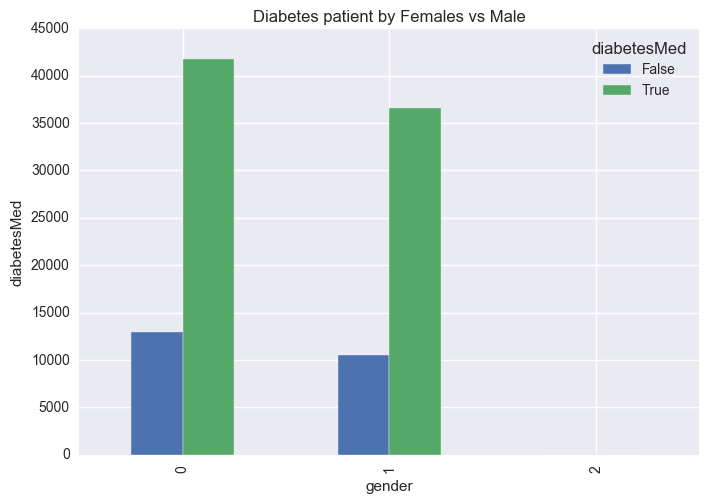

In [36]:
#barplot of diabetesMed grouped by gender(True or False)
pd.crosstab(diabetes3.gender, diabetes3.diabetesMed.astype(bool)).plot(kind='bar')
plt.title('Diabetes patient by Females vs Male')
plt.xlabel('gender')
plt.ylabel('diabetesMed')

# Gender:  Male = 0, Female = 1 

### Correlation
Correlation does not imply causation,there is potential relationship between a pair of variables when we plot 'insulin' with 'diabetesMed'. The Pearson Correlation coefficient of 0.26 is weak because the selected variables are labels or have categorical variance

In [37]:
# Look at correlation between variables
diabetes3.corr()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,number_outpatient,num_lab_procedures,gender,age,num_medications,number_inpatient,number_emergency,time_in_hospital,insulin
admission_type_id,1.000000,-0.117126,0.129888,0.106654,0.008950,-0.000310,0.098659,0.026511,-0.143713,0.014592,-0.007209,0.079535,-0.038161,-0.019116,-0.012500,-0.007858
number_diagnoses,-0.117126,1.000000,0.073734,0.072114,-0.104820,0.021186,0.084176,0.094152,0.152773,-0.003407,0.242597,0.261526,0.104710,0.055539,0.220186,0.026834
num_procedures,0.129888,0.073734,1.000000,-0.135400,0.038235,-0.006821,0.027087,-0.024819,0.058066,0.059980,-0.030104,0.385767,-0.066236,-0.038179,0.191472,0.009091
admission_source_id,0.106654,0.072114,-0.135400,1.000000,-0.031816,0.001500,0.031173,0.027244,0.048885,-0.003843,0.044696,-0.054533,0.036314,0.059892,-0.006965,-0.010920
readmitted,0.008950,-0.104820,0.038235,-0.031816,1.000000,-0.057306,-0.015184,-0.068552,-0.037976,0.014533,-0.030271,-0.051772,-0.234283,-0.103024,-0.057718,-0.003113
diabetesMed,-0.000310,0.021186,-0.006821,0.001500,-0.057306,1.000000,-0.006367,0.016456,0.033107,0.015901,-0.022601,0.186910,0.026001,0.025923,0.062520,0.264170
race,0.098659,0.084176,0.027087,0.031173,-0.015184,-0.006367,1.000000,0.048456,-0.023033,0.055271,0.114684,0.027935,-0.006569,-0.012629,-0.015324,-0.029865
number_outpatient,0.026511,0.094152,-0.024819,0.027244,-0.068552,0.016456,0.048456,1.000000,-0.007602,-0.011481,0.023724,0.045197,0.107338,0.091459,-0.008916,0.013360
num_lab_procedures,-0.143713,0.152773,0.058066,0.048885,-0.037976,0.033107,-0.023033,-0.007602,1.000000,-0.003103,0.020770,0.268161,0.039231,-0.002279,0.318450,0.035507
gender,0.014592,-0.003407,0.059980,-0.003843,0.014533,0.015901,0.055271,-0.011481,-0.003103,1.000000,-0.050535,-0.022023,-0.014643,-0.021081,-0.029928,0.003435


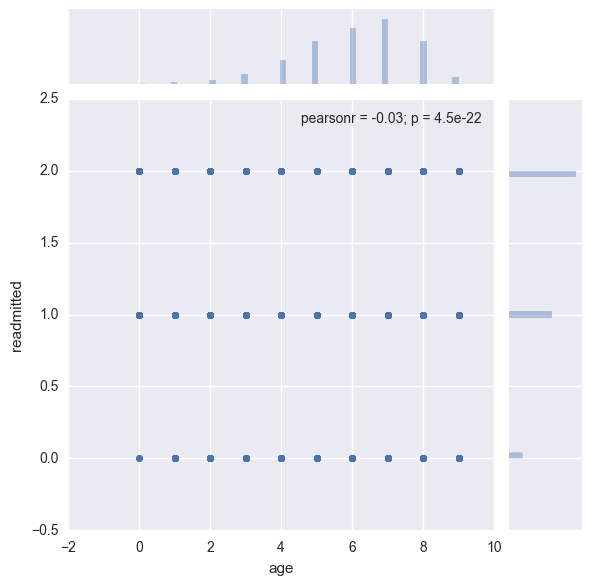

In [38]:
# Correlation - check a few interesting relationships and plot them

#sns.jointplot(x="insulin", y="readmitted", data=diabetes3);
#sns.jointplot(x="number_diagnoses", y="readmitted", data=diabetes3);
#sns.jointplot(x="num_medications", y="readmitted", data=diabetes3);
sns.jointplot(x="age", y="readmitted", data=diabetes3);
#sns.jointplot(x="race", y="readmitted", data=diabetes3);
#sns.jointplot(x="diabetesMed", y="readmitted", data=diabetes3);
#sns.jointplot(x="time_in_hospital", y="readmitted", data=diabetes3);
#sns.jointplot(x="num_procedures", y="readmitted", data=diabetes3);
#sns.jointplot(x="race", y="diabetesMed", data=diabetes3);

# The variables are not highly corelated and are not bounded by the extreme thresholds 1 to -1

# 1 Linear Regression - 
 ### Categorical response, 1 feature

In [39]:
y = diabetes3['readmitted'].values
y.shape

(101766,)

In [40]:
X = diabetes3['diabetesMed'].values
X = X[:, np.newaxis]
X.shape

(101766, 1)

### Train/Test Split

In [41]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

### Fit the  Linear Regression model

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

###  Evaluating a model - Linear regression - 1 feature

In [43]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.003


In [44]:
print('R2 score: %.3f' % lr.score(X_test, y_test))

R2 score: 0.003


##### R-squared : 0.003  or 0%
The  R-squared does not represent a robust model because the response is not a continous variable but is a categorical variable 'readmitted' hence the variance within the model is not explained by a single variable 'diabeteMed' which is also a categorical variable.

Hence,  Multi-momial Logistic regression should be applied to fit and predict a categorical outcome with three classes for 'readmitted'.

In [45]:
lr.coef_

array([-0.09514219])

***Interpretation of coefficient:
A 1 unit increase in 'readmitted' will lead to a a decrease in 'diabetesMed' by 0.095142 units with all other variables being unchanged in the model.The coefficient is negative because the weight or beta is a binary variable.That is 'diabetesMed' is 0 (for no medication) or 1(takes medication)

In [46]:
lr.intercept_

1.5019830374031344

#### Plot of training data - Min and Max predictions

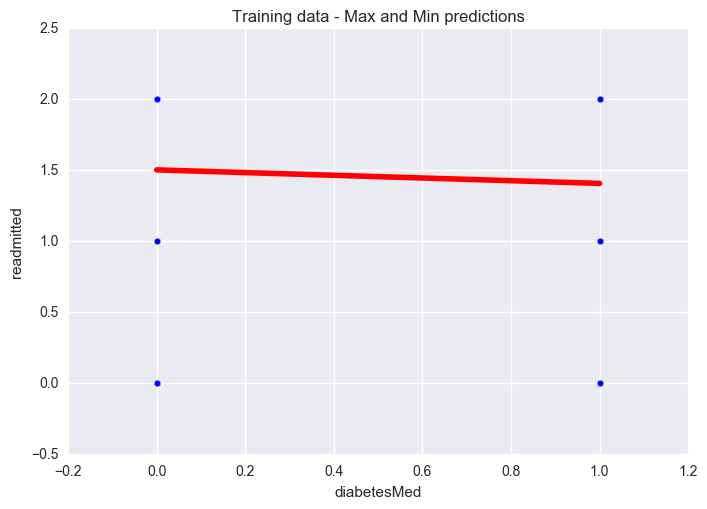

In [47]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('diabetesMed')
plt.ylabel('readmitted');
plt.title('Training data - Max and Min predictions')

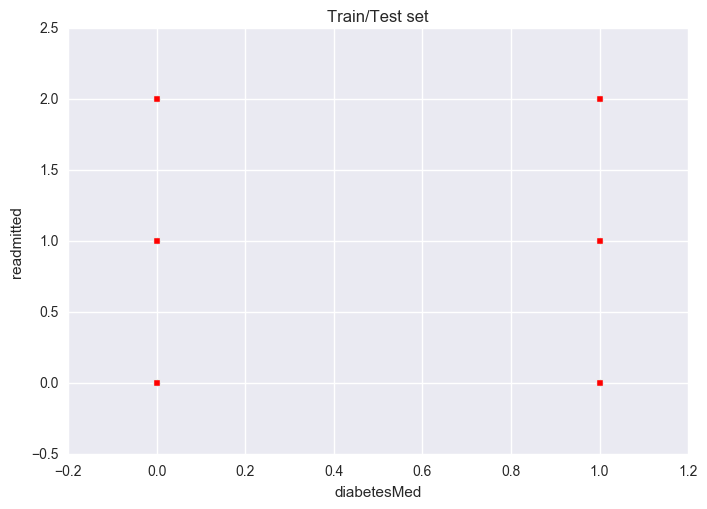

In [48]:
# Plot of training and test data

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('diabetesMed')
plt.ylabel('readmitted');
plt.title('Train/Test set')

## Fit a Linear regression model - Ordinary Least Squares


In [49]:
linreg = LinearRegression()
feature_cols = ['diabetesMed']
X = diabetes3[feature_cols]
y = diabetes3.readmitted
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# create a fitted model in one line using Ordinary Least Squares

lm = smf.ols(formula='readmitted ~ diabetesMed' , data=diabetes3).fit()

# print the coefficients
lm.params

Intercept      1.499252
diabetesMed   -0.093155
dtype: float64

####  Interpretation of coefficients: 

1.A 1 unit increase in 'diabetesMed' is associated with a 0.093155 unit decrease  in 'readmitted'with all other parameters being equal in the model.

2. R-squared is 0.00% and small due to the fact that we are predicting a outcome based on a categorical response variable. A small R-squared the model is a poor fit and  a single variable 'diabetesMed'does not explain all the variance in the model.

3. The p-value of 'diabetesMed' p= 0.000 which was less than <0.05 was statistically significant.

4.  The Pearson correlation coefficient of -0.057306, indicated a weak negative relationship between 'diabetesMed' and 'readmitted' were not highly correlated variables since the value was not between the extremes of -1 and 1.

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             readmitted   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     335.3
Date:                Sun, 11 Dec 2016   Prob (F-statistic):           8.95e-75
Time:                        12:49:18   Log-Likelihood:            -1.0559e+05
No. Observations:              101766   AIC:                         2.112e+05
Df Residuals:                  101764   BIC:                         2.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.4993      0.004    335.833      0.000         1.491     1.508
diabetesMed    -0.0932      0.005    -18.311      0.000        -0.103    -0.083
==============================================================================
Omnibus:                    10809.731   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11690.094
Skew:                          -0.783   Prob(JB):                         0.00
Kurtosis:                       2.446   Cond. No.                         3.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# create a DataFrame with the minimum and maximum values of diabetesMed
X_new = pd.DataFrame({'diabetesMed': [diabetes3.diabetesMed.min(), diabetes3.diabetesMed.max()]})
X_new.head()

,diabetesMed
0,0
1,1


In [53]:
preds = lm.predict(X_new)
preds

array([ 1.49925223,  1.40609727])

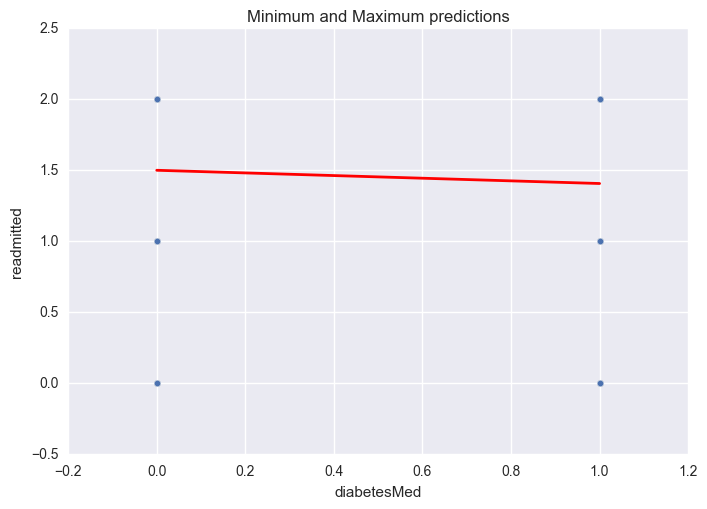

In [54]:
# first, plot the observed data
diabetes3.plot(kind='scatter', x='diabetesMed', y='readmitted', title='Minimum and Maximum predictions')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

### Linear regression equation: y=β0+β1x

### Predictions - Linear regression

In [55]:
# compute prediction for diabetesMed=1 using the equation
linreg.intercept_ + linreg.coef_ * 1

array([ 1.40609727])

In [56]:
# compute prediction for diabetesMed=1 using the predict method
linreg.predict(1)

array([ 1.40609727])

In [58]:
# linreg
# you could make predictions for arbitrary points, and then plot a line connecting them
print linreg.predict(0)
print linreg.predict(1)

[ 1.49925223]
[ 1.40609727]


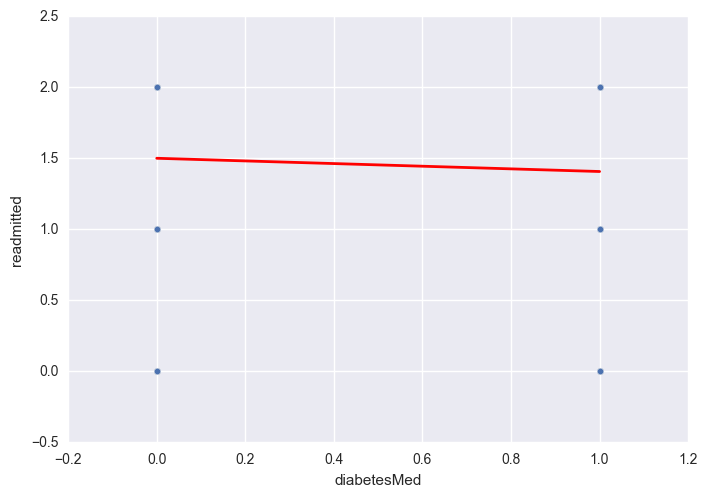

In [59]:
# put the plots together

# first, plot the observed data
diabetes3.plot(kind='scatter', x='diabetesMed', y='readmitted')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

# 2  Classification -  to predict a categorical response 

###  Multi-nomial Logistic regression - categorical response with 3 classes on 2 features

#### Diabetes data set

In [60]:
# Import the required libraries

import numpy as np
from sklearn import datasets

In [61]:
# Use the cleaned and slready loaded dataset diabetes3

diabetic_data.to_csv('diabetic_data_clean.csv',index=False)
diabetes3 = pd.read_csv('diabetic_data_clean.csv')

In [62]:
# Step 1: define 'diabetesMed' as the feature and 'readmitted' as the response
feature_cols =['diabetesMed','age']
X = diabetes3[feature_cols]
y = diabetes3.readmitted
np.unique(y)

array([0, 1, 2])

#### Train/Test split

In [63]:
# Step 2: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [64]:
# Step 3: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('diabetesMed', 0.2365835099738883), ('age', 0.036746194906575817)]

In [66]:
# Step 4: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.543432120116


#### Add another feature: feature_cols =3, Model accuracy

In [67]:
# Step 5: add 'gender' as third feature and calculate testing accuracy. Make predictions on the test set
diabetes3.age.fillna(diabetes3.age.mean(), inplace=True)
feature_cols = ['diabetesMed', 'age', 'gender']
X = diabetes3[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.543432120116


####  accuracy of model does not change with including third  feature 'gender'

In [68]:
# check  classes of 'readmitted' . No =0, >30 = 1,<30= 2
diabetes3.readmitted.value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

#### Confusion Matrix - evaluate logistic regression on 3 features

In [69]:
# Step 6: Confusion Matrix - 3 features 
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

[[    0     0  2757]
 [    0     0  8859]
 [    0     0 13826]]


In [70]:
# sensitivity(recall or true positive rate): TP/TP+FN
8859/float(0+8859)

1.0

In [71]:
# specificity(precision): TN/TN+FP 
0/float(0+2757)

0.0

### Logistic Regression - 1 feature

In [73]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['diabetesMed']
X = diabetes3[feature_cols]
y = diabetes3.readmitted
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

#### Class Predictions

In [74]:
# print the class predictions
assorted_pred_class

array([2, 2, 2, ..., 2, 2, 2])

In [82]:
# add predicted class to DataFrame
#diabetes3['assorted_pred_class'] = assorted_pred_class

# sort DataFrame by diabetes3
#diabetes3.sort_values(by='diabetesMed', inplace=True)

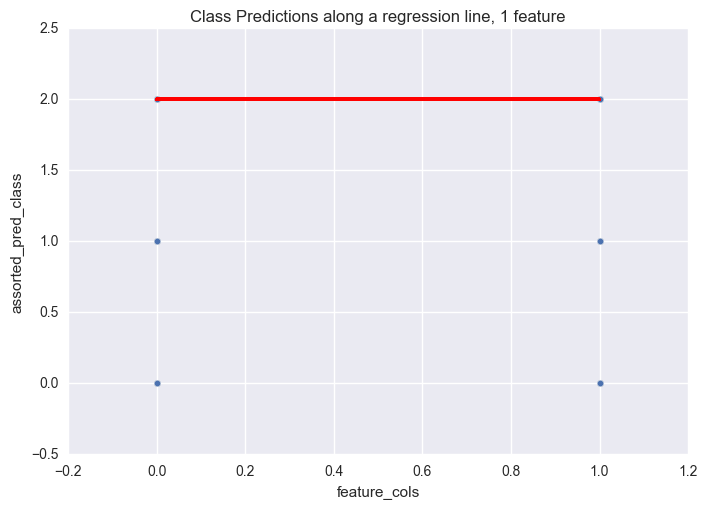

In [75]:
# plot the Class predictions that includes the regression line
plt.scatter(diabetes3.diabetesMed, diabetes3.readmitted)
plt.plot(X, assorted_pred_class, color='red')
plt.xlabel('feature_cols')
plt.ylabel('assorted_pred_class')
plt.title('Class Predictions along a regression line, 1 feature')

### Predicted Probabilities

In [76]:
# store the predicted probabilites of class 1 

assorted_pred_prob = logreg.predict_proba(X)[:, 1]
assorted_pred_prob

array([ 0.30880674,  0.36136952,  0.36136952, ...,  0.36136952,
        0.36136952,  0.30880674])

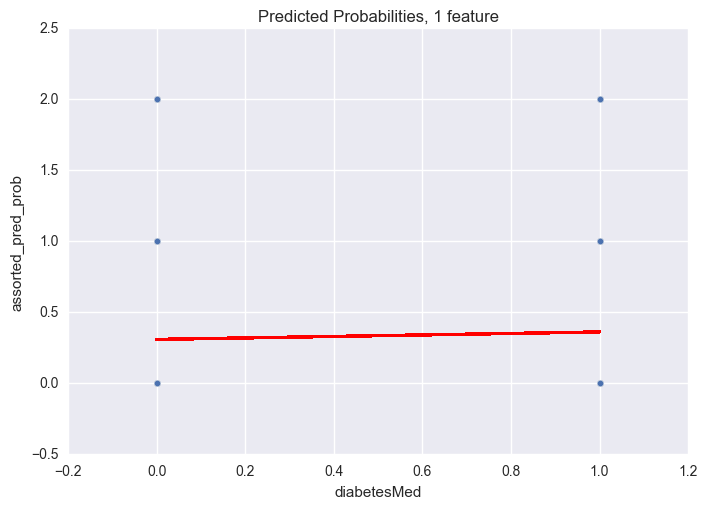

In [77]:
# plot the predicted probabilities
plt.scatter(diabetes3.diabetesMed, diabetes3.readmitted)
plt.plot(diabetes3.diabetesMed, assorted_pred_prob, color='red')
plt.xlabel('diabetesMed')
plt.ylabel('assorted_pred_prob')
plt.title('Predicted Probabilities, 1 feature')

### Example predictions

In [78]:
# examine some example predictions ('readmitted' classes: 0,1,2)

print logreg.predict_proba(1)
#print logreg.predict_proba(2)
#print logreg.predict_proba(0)

[[ 0.11626661  0.36136952  0.52236387]]


*** What is this? The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

### Probability vs Odds

In [79]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9, 0.99]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000
7,0.99,99.000000


#### Logodds

In [80]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225
7,0.99,99.000000,4.595120


In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

## Part 6: Interpreting Logistic Regression Coefficients

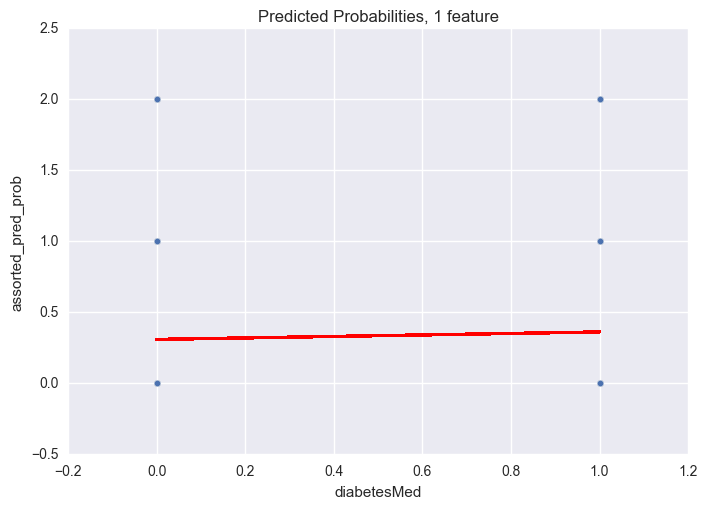

In [81]:
# plot the predicted probabilities again

plt.scatter(diabetes3.diabetesMed, diabetes3.readmitted)
plt.plot(diabetes3.diabetesMed, assorted_pred_prob, color='red')
plt.xlabel('diabetesMed')
plt.ylabel('assorted_pred_prob')
plt.title('Predicted Probabilities, 1 feature')

In [82]:
# compute predicted log-odds for diabetesMed=0 using the equation
logodds = logreg.intercept_ + logreg.coef_ *0
logodds

array([[-2.24281951, -0.80570445,  0.38559705],
       [-2.24281951, -0.80570445,  0.38559705],
       [-2.24281951, -0.80570445,  0.38559705]])

In [83]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([[ 0.10615877,  0.44677309,  1.47049201],
       [ 0.10615877,  0.44677309,  1.47049201],
       [ 0.10615877,  0.44677309,  1.47049201]])

#### Convert Odds to Probability

In [84]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([[ 0.09597064,  0.30880661,  0.59522233],
       [ 0.09597064,  0.30880661,  0.59522233],
       [ 0.09597064,  0.30880661,  0.59522233]])

##### Predict Probability method  - Take diabetes medication = 1, or not =0

In [85]:
# compute predicted probability for diabetesMed=0 using the predict_proba method - takes diabetes medication
logreg.predict_proba(0)[:, 1]

array([ 0.30880674])

#### Interpret coefficient

In [86]:
# examine the coefficient for diabetesMed
zip(feature_cols, logreg.coef_[0])

[('diabetesMed', 0.21454995486477504)]

**Interpretation:** A 1 unit increase in 'diabetesMed' is associated with a 0.214549 unit increase in the log-odds of 'assorted'.

Bottom line: Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [87]:
# increasing diabetesMed by 1 (so that diabetesMed=1) increases the log-odds by 0.214
logodds = -2.24281951 + 0.21454995486477504
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.11626660496630027

#### Interpret intercept

In [88]:
# examine the intercept
logreg.intercept_

array([-2.24281951, -0.80570445,  0.38559705])

Interpretation: For an 'diabetesMed' value of 0, the log-odds of 'assorted' is -2.24


### Probabilities sum to 1

In [89]:
# convert log-odds to probability ( probabilities sum to 1)
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.09597064,  0.30880661,  0.59522233])

That makes sense from the plot above, because the probability of assorted=1 should be very low for such a low 'diabetesMed' value.

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

#### Part 7: Comparing Logistic Regression with Other Models

##### Advantages of logistic regression:

    Highly interpretable (if you remember how)
    Model training and prediction are fast
    No tuning is required (excluding regularization)
    Features don't need scaling
    Can perform well with a small number of observations
    Outputs well-calibrated predicted probabilities

##### Disadvantages of logistic regression:

    Presumes a linear relationship between the features and the log-odds of the response
    Performance is (generally) not competitive with the best supervised learning methods
    Sensitive to irrelevant features
    Can't automatically learn feature interactions



### Accuracy of the model, 1 feature

In [90]:
#  calculate accuracy
assorted_pred_class = logreg.predict(X)
from sklearn import metrics
print metrics.accuracy_score(y, prds)

0.53911915571


### Confusion Matrix - evaluate the classifier

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
#   classes of 'readmitted' . No =0, >30 = 1,<30= 2
diabetes3.readmitted.value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

In [93]:
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y, prds)

[[    0     0 11357]
 [    0     0 35545]
 [    0     0 54864]]


##Top Left: True Negatives <Br>
##Top Right False Positives <Br>
##Bottom Left: False Negatives <br>
##Bottom Right: True Positives <br>


### Meaning: 
#### Sensitivity = 54864 / (0 + 54864) == 1.0
#### Specificity =  0       / (35545 + 0) == 0.0

In [94]:
#  Accuracy of the model(ACC): TP+TN/Total Population , 3 features
54864/float(0+35545+0+54864+11357)

0.5391191557101586

# 2 Classification 
### Multinomial Logistic regression -categorical response - 5 features

In [95]:
# 1. define race, age, gender, diabetesMed, number of medications, number of diagnoses as the features and readmitted as the response
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['diabetesMed','race','age', 'num_medications','number_diagnoses']
X = diabetes3[feature_cols]
y = diabetes3.readmitted 

logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [96]:
# 2. Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [97]:
# 3. Fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('diabetesMed', 0.2004083164730244),
 ('race', -0.0086843724098223732),
 ('age', 0.016416875613049251),
 ('num_medications', 0.0076313060340393981),
 ('number_diagnoses', 0.071617711481847146)]

### Accuracy score - 5 features

In [98]:
# 4. Make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.543039069256


### Model Accuracy score - 6 features

In [99]:
# 5. Add gender as an extra feature and calculate testing accuracy
diabetes3.gender.fillna(diabetes3.gender.mean(), inplace=True)
feature_cols = ['diabetesMed','race','age', 'num_medications','number_diagnoses','gender']
X = diabetes3[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.543039069256


#### Adding  extra feature ' gender' did not change the accuracy of the model 54.30%

In [100]:
# Count  classes of 'readmitted' . No =0, >30 = 1,<30= 2
diabetes3.readmitted.value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

### Evaluate Logistic regression model - confusion matrix - 6 features

In [101]:
# 7. Confusion Matrix - 6 features
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

[[    0     9  2748]
 [    0     4  8855]
 [    0    14 13812]]


### Interpretation of the Confusion Matrix

* The Confusion Matrix(classifier) - 6 features

* How many classes are there? For re-admissions there were three possible predicted classes 'No'=0, '<30'=2, and'>30'=1
* How many  readmitted patients were there? Class 0 = 13812 patients(not readmitted), Class 1= 8855 patients and class 2 = 2748 patients 
* How many times is Readmission predicted for Class 1 = >30: 4 times
* How many times is Readmission predicted for Class 2 = <30: 9 times
* How many times is readmission predicted for class 0 = 14 times


1. Sensitivity or Recall (True Positive rate) = Number of true positives/Number of True Positives + Number of False Negatives = 8855/float(8855+4) = 0.999548

2. Specificity or Precision = Number of true negative /Number of true negatives +  Number of  false positives
* Specificity = TN/TN + FP =9/(float(9+2758) = 0.00


### Multiple Logistic regression - with 6 features

In [102]:
# using statsmodel for multi -logit model
import statsmodels.api as sm
mlogit_mod = sm.MNLogit(y_train, X_train)
mlogit_res = mlogit_mod.fit()
print(mlogit_res.summary())
print mlogit_res.params

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1697: VisibleDeprecationWarning: using a non-integer number instead of an integer 

Optimization terminated successfully.
         Current function value: 0.953100
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:             readmitted   No. Observations:                76324
Model:                        MNLogit   Df Residuals:                    76312
Method:                           MLE   Df Model:                           10
Date:                Sun, 11 Dec 2016   Pseudo R-squ.:               -0.006393
Time:                        13:00:23   Log-Likelihood:                -72744.
converged:                       True   LL-Null:                       -72282.
                                        LLR p-value:                     1.000
    readmitted=1       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
diabetesMed          0.1563      0.028      5.643      0.000         0.102     0.211
race       

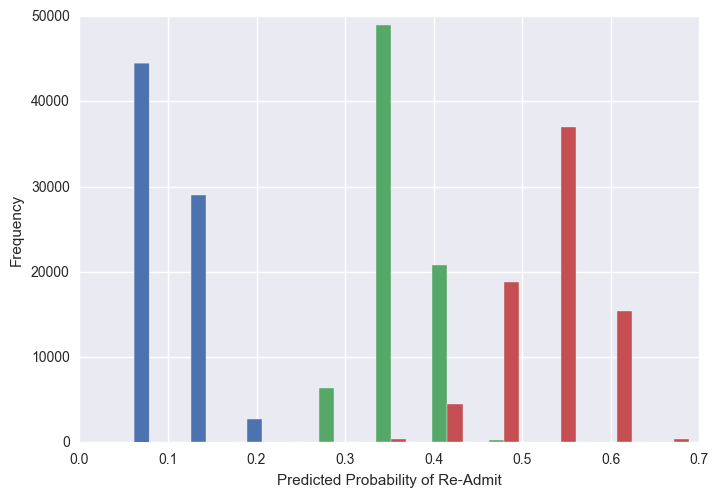

In [104]:
# make predictions on testing set
y_pred_class = mlogit_res.predict(X_train)
plt.hist(y_pred_class)
plt.xlabel('Predicted Probability of Re-Admit')
plt.ylabel('Frequency')
plt.show()

##  Logistic regression - 1 feature

# 3 Evaluation of Models - how can we make a model that generalizes well?

#### Test Set Approach:
1. Split dataset
2. Train model e.g. 80/20 or 70/30
3. Test model
4. Parameter tuning
5. Choose best model
6. Train on all data
7. Make predictions on new data
8. Test set error: different train/test splits will give us different test set errors
9. Cross validation (K-fold cross-validation) take average of the train/test splits -> calc. test set error

#### Bias-Variance tradeoff

In [105]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(color_codes=True)

### Cross -validation on Logistic regression on 1 feature

In [106]:
# Step 1: read the data from diabetic_data.csv into a DataFrame
import pandas as pd
# read transformed and cleaned dataset
diabetes3

# Step 2: define diabetesMed as the features and readmitted as the response
feature_cols = ['diabetesMed']
X = diabetes3[feature_cols]
y = diabetes3.readmitted

# Step 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Step 4: fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# Step 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.543432120116


### Predict most frequent class

In [107]:
# compute null accuracy manually. Predict most frequent class

print y_test.mean()
print 1 - y_test.mean()

1.4350679978
-0.435067997799


In [108]:
# equivalent function in scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print metrics.accuracy_score(y_test, y_dumb_class)

0.543432120116


### Cross-validation on 6 more features

In [109]:
feature_cols = ['diabetesMed','race','age', 'num_medications','number_diagnoses','gender']
X = diabetes3[feature_cols]

# 1. : split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 2. : fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)

# 3. : make predictions on testing set and calculate accuracy
y_pred_class = y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.543039069256


### Confusion matrix - 6 features

In [110]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[    0,     9,  2748],
       [    0,     4,  8855],
       [    0,    14, 13812]])

In [111]:
# sensitivity - recall (true positive rate)
8855/float(4+8855)

0.9995484817699515

In [112]:
# Specificity
9/float(9+2748)

0.003264417845484222

In [113]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

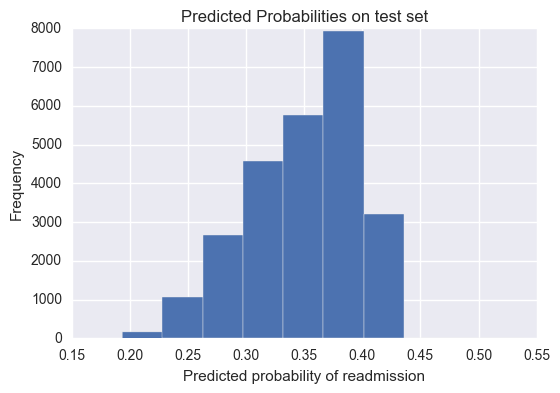

In [114]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of readmission')
plt.ylabel('Frequency')
plt.title('Predicted Probabilities on test set')

In [117]:
# change the threshold for predicting readmitted to increase sensitivity
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [118]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1,-1), 0.25).T

###  New Confusion Matrix - evaluate model - Logistic regression

In [119]:
# new confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[   36  2721     0]
 [  147  8712     0]
 [  452 13374     0]]


### True positive rate 98.34% 

In [120]:
# new sensitivity (True positive rate or Recall) = TP/Actual 'yes'
8712/ float(147+8712)

0.9834067050457163

In [121]:
# new specificity

36/float(36+2721)

0.013057671381936888

# K-fold Cross Validation - on Classification 

* Cross-validation: data is a resampling method to estimate test error for statistical learning method to evaluate performance and select level of flexibility
* The test error is the average error that results from the  statistical learning  method to predict the response ('target') on a new observation that was not used in the training method.

* Cross-validation is more accurate  estimte of prediction error
* Used for:
####  a) Model Selection,
####  b) Parameter tuning

* Data is randomly divided from the availble set of observations:
1. Training set
2. Validation set (i.e. Hold-out set or OOS)

## Model Evaluation
#### 10-fold cross-validation :

** Logistic Regression + Cross-Validation

### Starting with 50 predictors and 20 samples, find 100 predictors

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


# 1. evaluate the model using 10-fold cross-validation

scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=100)
print scores
print scores.mean()

[ 0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53929273  0.53929273  0.53929273
  0.53929273  0.53929273  0.53929273  0.53929273  0.53929273  0.53929273
  0.53929273  0.53929273  0.53929273  0.53982301  0.53982301  0.53982301
  0.53982301  0.53982301  0.53982301  0.53982301  0.53937008  0.53937008
  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008
  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008
  0.53937008  0.53937008  0.53937008  0.53937008  0

## Test error or average error is
#### 0.538962058482 produced from the scores.mean

For K= 10:
*K = 1 the first fold is the validation set (hold out set) and K_fold cross validation was fit on the remaining K-1 folds

* The scoring accuracy  produced a test error that approximates the logistic regression model accuracy due to 'bias-variance trade-off'

### Advantage: 
*  K-fold cross-validation gives a more accurate estimate of the test error than LOOCV (Leave One-Out Cross_Validation) due to **bias-variance trade-off

** 0.543039069256 The accuracy of the test set vs test error(average of mean score) 0.538962 is slightly higher

In [123]:
# Examine test error on cross-validation on K=5

# 2. evaluate the model using 5-fold cross-validation

scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=25)
print scores
print scores.mean()

[ 0.53904715  0.53904715  0.53904715  0.53904715  0.53904715  0.53904715
  0.53904715  0.53917956  0.53917956  0.53917956  0.53917956  0.53917956
  0.53917956  0.53917956  0.53906634  0.53906634  0.53906634  0.53906634
  0.53906634  0.53906634  0.53919882  0.5374785   0.53674121  0.5387073
  0.53969034]
0.538952048149


#  4 Principal Component Analysis (PCA)
* PCA was not conducted because the variables in the diabetes dataset were not all continuous but included categorical and binary predictors.

# 5  Shrinkage - Regularization
*** Variable selection -> Decreases varince

* Bias-Variance trade-off
   * Bias (underfitting)
   *Variance(overfitting)
1. Subset Selection - to reduce computation time of large number of features
   * choose subset of features to include in model and use cross-validation to evaluate model.
2. Shrinkage (regularization): a tuning parameter penalizes the size of coefficients and shrinks them towards zero.
  a) Ridge regression like OLS but includes a penalty term and the **coefficients approach zero
  **b) Lasso regression is like  Ridge regression but you take the **absolute value of beta in the penalty term.
  **c) Elastic Net : Ridge + Lasso
3. Dimension Reduction

### Lasso regularization
The diabetes dataset orignally had 50 variables in various formats and I believe many of the features were irrelvant and were dropped or removed during the transformation stage of the data. 
After cleaning and transforming the diabetes3 dataset, there remains 16 variables. Hence we will use Lasso since it adopts a process where  a feature has a zero coefficient will be removed.

In [124]:
## TASK: Regularized regression
## FUNCTIONS: Ridge, RidgeCV, Lasso, LassoCV


#1.Prepare data 
# read in data, remove categorical features, remove rows with missing values
import pandas as pd

# define X and y
X = diabetes3.iloc[:, :-1]
y = diabetes3.iloc[:, -1]

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [125]:
# How many columns are in X?
X.shape
len(X.columns)

15

In [126]:
#2.Linear Regression Model Without Regularization ##########
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_
# What are these numbers?
len(lm.coef_)

15

In [127]:
# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print 'RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (no regularization) = 0.805283433759


####  Linear  regression with Ridge Regression

In [128]:
##2. Ridge Regression Model ##########

# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print 'RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (Ridge reg.) = 0.805501047881


In [131]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range, cv= 5)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
print 'RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
# What is the range of alpha values we are searching over?

# we are using regularisation with cross validation with cv

##

alpha_range
rregcv.alpha_

RMSE (Ridge CV reg.) = 0.805283431995


1.0

### Lasso -  increases alpha and compresses coefficients to zero

In [132]:
#3. Lasso Regression Model ##########
# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print 'RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (Lasso reg.) = 0.836390434502


### Select a tuning parameter alpha for Lasso 

In [133]:
# try a smaller alpha
las = Lasso(alpha=0.0001, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print 'RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))



RMSE (Lasso reg.) = 0.806867198652


In [134]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
alpha_range = 0.01**np.arange(-2,3)
lascv = LassoCV(normalize=True, alphas=alpha_range,cv=5)
lascv.fit(X_train, y_train)
lascv.alpha_
lascv.coef_
preds = lascv.predict(X_test)
print 'RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
lascv.alpha_
lascv.coef_

RMSE (Lasso CV reg.) = 0.806867198652


array([ -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   4.60882045e-01,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   1.17620952e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

### Lasso
RMSE (Lasso CV reg.) = 0.806867198652

* Lasso has improved the model by compressing Betas (coefficients or weights) to zero the model accuracy has increased to 0.806867

# 6 Clustering - K-means clustering  - PART B (Second  jupyter notebook)
(to find patterns in unstructured data)


In [ ]:
## clustering output crashed hence work is continued on second notebook